In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# URL of the Boston Housing dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset
boston_data = pd.read_csv(url, sep='\s+', header=None, names=columns)

# Separate features and target variable
X = boston_data.drop("MEDV", axis=1)
y = boston_data["MEDV"]

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

## Step 2: Preprocess the Data

Standardizing the features is often essential when using regularization techniques.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

## Step 3: Train Ridge Regression Model

Now, we'll train a Ridge regression model and evaluate its performance.

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1) #alpha is the regularization parameter
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_val)

ridge_mse = mean_squared_error(y_val, ridge_pred)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 27.40191970262276


## Step 4: Train Lasso Regression Model

In [25]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_val)

lasso_mse = mean_squared_error(y_val, lasso_pred)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 28.157147867398983


## Step 5: Analyze the Results

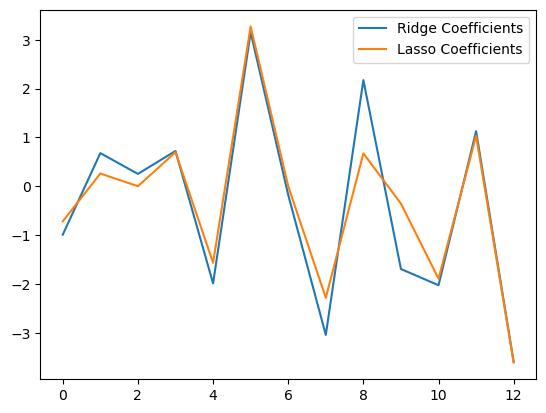

In [26]:
import matplotlib.pyplot as plt

plt.plot(ridge_model.coef_, label='Ridge Coefficients')
plt.plot(lasso_model.coef_, label='Lasso Coefficients')
plt.legend()
plt.show()

## Step 6: Hyperparameter Tuning

perform hyperparameter tuning to find the optimal regularization parameter(α),
using cross-validation.



In [28]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge_cv = RidgeCV(alphas=[0.1,1,10])
ridge_cv.fit(X_train, y_train)
print("Best alpha for Ridge:", ridge_cv.alpha_)

lasso_cv = LassoCV(alphas=[0.1,1,10])
lasso_cv.fit(X_train, y_train)
print("Best alpha for Lasso:", lasso_cv.alpha_)

Best alpha for Ridge: 10.0
Best alpha for Lasso: 0.1
